# AutoEncoder(AE)

- 입력 데이터의 차원축소를 통해 의미있는 잠재공간(Latent Space / Manifold)을 학습
   - Encoder 학습을 위해 Decoder를 사용

# 1. Load MNIST Dataset



> ## 1) X_train and X_test

In [1]:
from keras.datasets import mnist
(X_train, _), (X_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

> ## 2) Normalization and Reshape

In [3]:
X_train = X_train / 255. # 정규화
X_test = X_test / 255.

X_train = X_train.reshape(60000, 28 * 28) # 1차원으로 핀다
X_test = X_test.reshape(10000, 28 * 28)

In [4]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# 2. Keras Modeling with Functional API

> ## 1) 'Latent Space' Size

In [5]:
encoding_dim = 32

> ## 2) Encoder

- Input

In [6]:
from keras import layers

input_img = layers.Input(shape = (784, ))

- Encoding Layers and Encoding Model

In [7]:
encoded = layers.Dense(256, activation = 'elu')(input_img)        # Input 256 layer로 encode
encoded = layers.Dense(128, activation = 'elu')(encoded)          # 윗 줄의 encoded를 128 layer로 encode
encoded = layers.Dense(encoding_dim, activation = 'elu')(encoded) # 윗 줄의 encoded를 encoding_dim(32)로 encode

> ## 3) Decoder

- Decoding Layers and Decoding Model

In [8]:
decoded = layers.Dense(128, activation = 'elu')(encoded)        # 위 셀에서 최종으로 나왔던 encoded(latent space)를 128 layer로 decode
decoded = layers.Dense(256, activation = 'elu')(decoded)        # 위 줄의 decoded를 256 layer로 decode
decoded = layers.Dense(784, activation = 'sigmoid')(decoded)    # 위 줄의 decoded를 원본 784 layer로 decode

# 3. AutoEncoder Model



> ## 1) 'autoencoder' Model

In [9]:
from keras import models

autoencoder = models.Model(input_img, decoded)

In [10]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488

> ## 2) 'encoder' Model

In [11]:
encoder = models.Model(input_img, encoded)

In [12]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
Total params: 237,984
Trainable params: 237,984
Non-trainable params: 0
_________________________________________________________________


> ## 3) 'decoder' Model

In [13]:
encoded_input = layers.Input(shape = (encoding_dim,))

decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = models.Model(encoded_input, decoder_layer)

In [14]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488    
Total params: 238,736
Trainable params: 238,736
Non-trainable params: 0
_________________________________________________________________


# 4. Model Fit

> ## 1) Model Compile

In [15]:
autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam')

> ## 2) Model Training

In [17]:
autoencoder.fit(X_train, X_train,
                epochs = 50,
                batch_size = 256,
                validation_data = (X_test, X_test))

Epoch 1/50
235/235 [==============================] - 4s 5ms/step - loss: 0.2789 - val_loss: 0.1358
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1287 - val_loss: 0.1118
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1105 - val_loss: 0.1026
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1025 - val_loss: 0.0979
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0981 - val_loss: 0.0953
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0951 - val_loss: 0.0923
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0926 - val_loss: 0.0907
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0911 - val_loss: 0.0889
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0897 - val_loss: 0.0880
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0887 - val_loss: 0.0873

# 5. Model Predice

> ## 1) Image Encoding

- Create 'Latent Space'

In [19]:
encoded_imgs = encoder.predict(X_test)
encoded_imgs.shape

(10000, 32)

> ## 2) 'Latent Space' Decoding

In [20]:
decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs.shape

(10000, 784)

# 6. Visualization

- 10개의 이미지 데이터를 모델에 적용

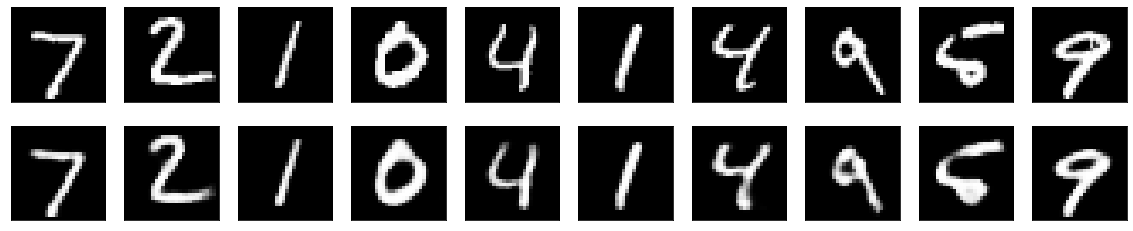

In [22]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize = (20, 4))
for i in range(n):
   
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))  
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


### 
# The End
###